In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Cargando los datos

In [2]:
dataset = pd.read_csv('..\datos_sin_procesar\Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 2. Observando las variables categóricas y las numéricas

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 3. Limpieza de datos

#### 3.1. Datos faltantes

Se verifica si existen datos faltantes

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Se puede observar que no existen datos faltantes. Todas las columnas tienen la misma cantidad de registros: 10000

#### 3.2. Columnas irrelevantes

Se eliminarán las colunmas RowNumber, CustomerId y Surname, ya que no aportan información relevante para el problema.

In [5]:
columnas_eliminar = ['RowNumber','CustomerId','Surname']
dataset.drop(columns=columnas_eliminar, axis=1, inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
#Conteo de los niveles en las diferentes columnas categóricas
print("Columna Geography: {} subniveles".format(dataset['Geography'].nunique()))
print("Columna Gender: {} subniveles".format(dataset['Gender'].nunique()))

Columna Geography: 3 subniveles
Columna Gender: 2 subniveles


Todas las columnas categóricas tienen más de un subnivel, por lo cual, no se eliminarán

In [8]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Todas las columnas numéricas tienen desviaciones estandar diferentes de cero, por lo cual, no se eliminará ninguna

#### 3.3. Filas repetidas

In [9]:
print("Tamaño del dataset antes de eliminar las filas repetidas: {}".format(dataset.shape))
dataset.drop_duplicates(inplace=True)
print("Tamaño del dataset después de eliminar las filas repetidas: {}".format(dataset.shape))

Tamaño del dataset antes de eliminar las filas repetidas: (10000, 11)
Tamaño del dataset después de eliminar las filas repetidas: (10000, 11)


Se puede observar que no había filas repetidas, ya que el número de filas antes y despues de ejecutar `drop_duplicates` es el mismo (10000 registros)

#### 3.4. Outliers en las variables numéricas

Se observan si existen outliers en las variables númericas. Si existen, se analiza si se deben eliminar o no, dependiendo del sentido del outliers

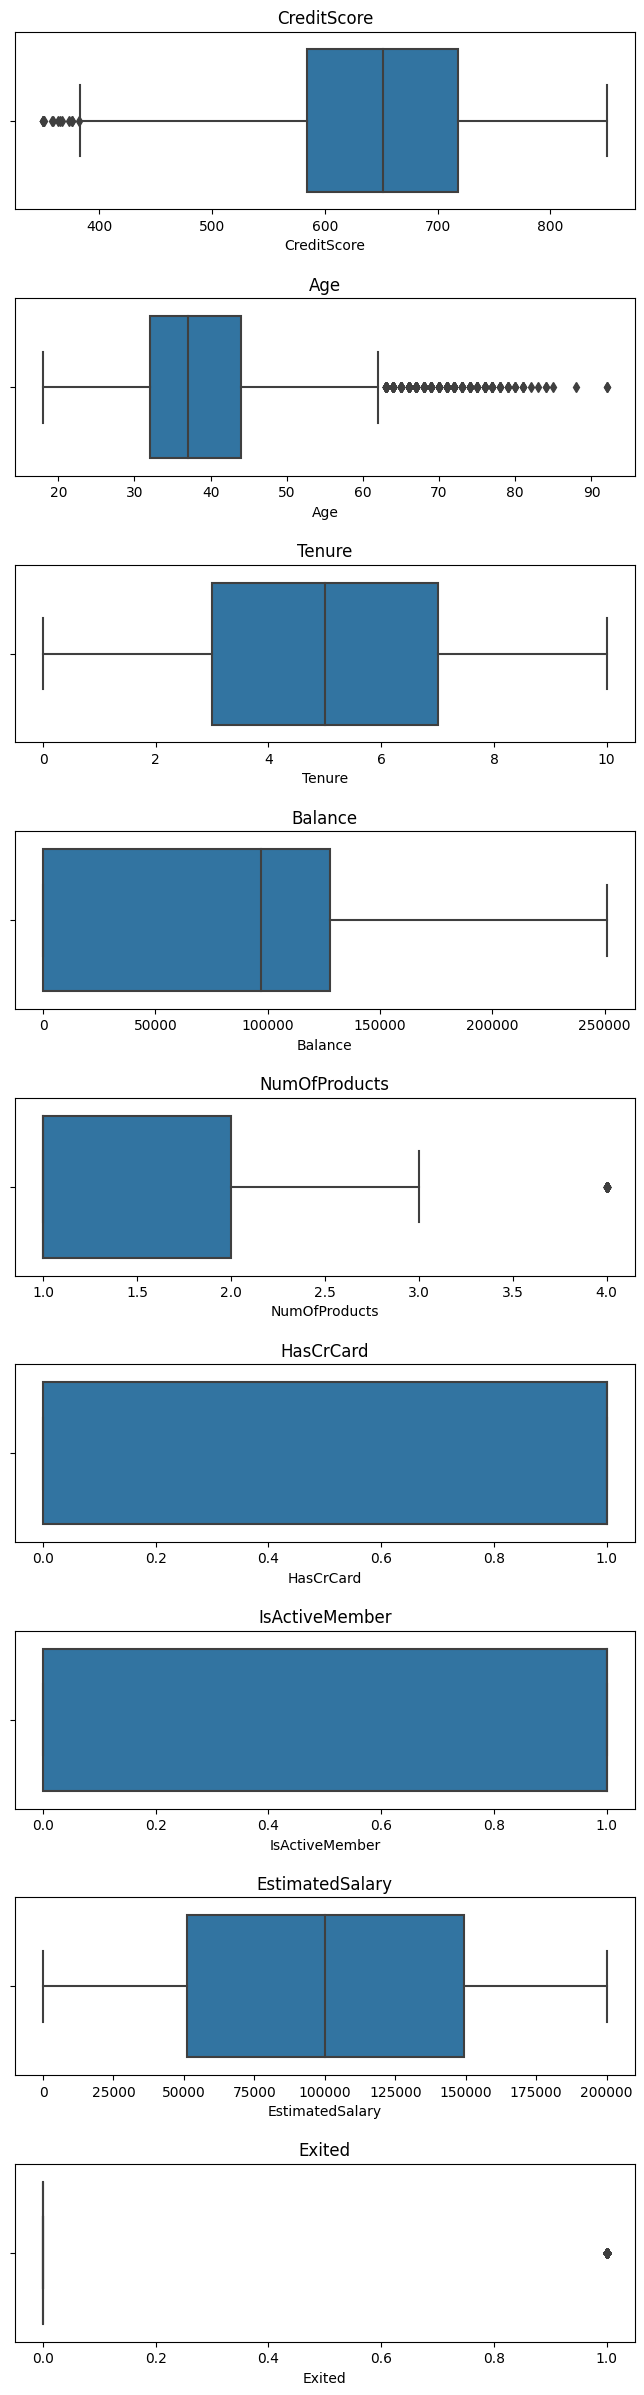

In [11]:
cols_num = dataset.select_dtypes(include=['int64','float64']).columns.to_list()
fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=dataset, ax=ax[i])
    ax[i].set_title(col)

Se puede observar que no hay outliers que pudieran ser irracionales. Por lo tanto, no se van a eliminar los outliers

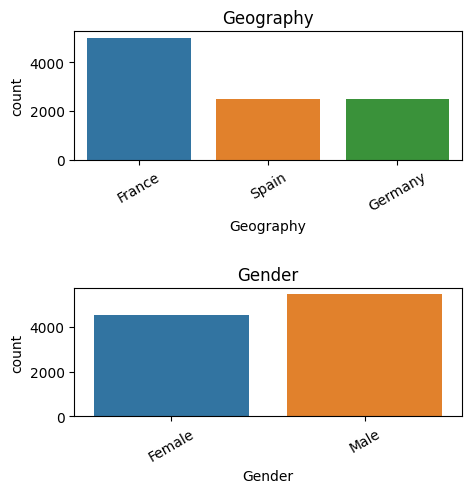

In [17]:
cols_num = dataset.select_dtypes(include=['object']).columns.to_list()
fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(5,5))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_num):
    sns.countplot(x=col, data=dataset, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Se puede apreciar que las variables categóricas no existen subniveles equivalentes (subniveles que son iguales, pero escritos de manera diferente). Por lo tanto, no hay que unificar subniveles

#### 3.5. Se guarda el nuevo dataset ya procesado

In [19]:
dataset.to_csv('..\datos_procesados\datos_procesados.csv')